**Brain tumor detection**

---



Necessary libraries

In [1]:
# Install Essential Libraries
!pip install ultralytics
from IPython import display
display.clear_output()

In [2]:
# Import Essential Libraries
import os
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Load YOLOv8

In [3]:
# Load a pretrained YOLOv8n model from Ultralytics
T_Model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 356MB/s]


Import dataset

In [25]:
#!pip install kagglehub
import kagglehub

path = kagglehub.dataset_download('pkdarabi/medical-image-dataset-brain-tumor-detection')

Data preprocessing

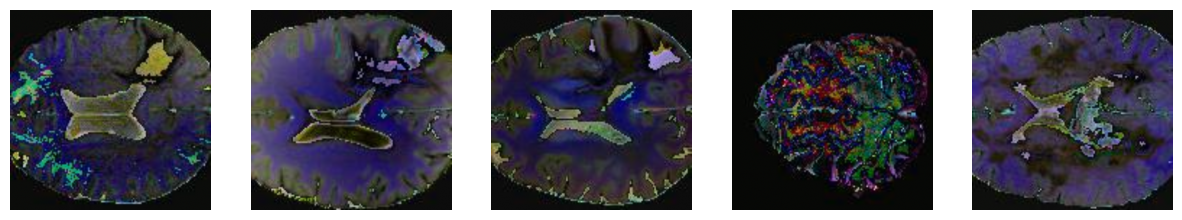

In [32]:
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

# Paths for your dataset (change according to your setup)
image_path = path + "/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/images/"
label_path = path + "/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels/"

# Preprocessing Parameters
img_size = (416, 416)  # Standard YOLOv8 size

# Function to preprocess images
def preprocess_image(image):
    # Resize the image
    image_resized = cv2.resize(image, img_size)
    # Normalize pixel values to [0, 1]
    image_normalized = image_resized / 255.0
    return image_normalized

# Display few samples after preprocessing
def visualize_preprocessed_images(image_paths, n=5):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:n]):
        img = cv2.imread(img_path)
        if img is None:
          print(f"Warning: Unable to read image from {img_path}")
          continue  # Skip to the next image if loading fails

        img = preprocess_image(img)
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

# Get all image paths
image_paths = glob(os.path.join(image_path, '*.jpg'))  # Modify if images are in other formats

# Apply preprocessing and visualize
visualize_preprocessed_images(image_paths)

Model training

In [17]:
yaml_file_path = path + '/TumorDetectionYolov8/OD8/Brain Tumor Detection/data.yaml'

results = T_Model.train( data= yaml_file_path,epochs=50,patience=20, batch= -1, optimizer='auto')

Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/root/.cache/kagglehub/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/versions/2/TumorDetectionYolov8/OD8/Brain Tumor Detection/data.yaml, epochs=50, time=None, patience=20, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None,

100%|██████████| 755k/755k [00:00<00:00, 120MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 219MB/s]


AMP: checks passed ✅


train: Scanning /root/.cache/kagglehub/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/versions/2/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels... 6930 images, 79 backgrounds, 0 corrupt: 100%|██████████| 6930/6930 [00:04<00:00, 1523.51it/s]


train: New cache created: /root/.cache/kagglehub/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/versions/2/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.75G total, 0.10G reserved, 0.06G allocated, 14.58G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3011433       8.196         0.191          74.6         392.8        (1, 3, 640, 640)                    list
     3011433       16.39         0.298         23.68         51.91        (2, 3, 640, 640)                    list
     3011433       32.79         0.537         24.53         51.63        (4,

train: Scanning /root/.cache/kagglehub/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/versions/2/TumorDetectionYolov8/OD8/Brain Tumor Detection/train/labels.cache... 6930 images, 79 backgrounds, 0 corrupt: 100%|██████████| 6930/6930 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /root/.cache/kagglehub/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/versions/2/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/labels... 1980 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:02<00:00, 704.07it/s]


val: New cache created: /root/.cache/kagglehub/datasets/pkdarabi/medical-image-dataset-brain-tumor-detection/versions/2/TumorDetectionYolov8/OD8/Brain Tumor Detection/valid/labels.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00059375), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      9.65G      1.806      2.981      1.896         54        640: 100%|██████████| 92/92 [02:04<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:18<00:00,  1.32s/it]


                   all       1980       4380      0.348      0.296      0.256      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      9.65G      1.715      2.371      1.797        301        640:  13%|█▎        | 12/92 [00:15<01:42,  1.28s/it]
Exception in thread Thread-17 (_pin_memory_loop):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 59, in _pin_memory_loop
    do_one_step()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/pin_memory.py", line 35, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.10/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.10/dist-packages/torch/multiprocessing/reductions.py", line 541, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.10/multiprocessi

KeyboardInterrupt: 